In [2]:
from __future__ import division
from neuron import h
from neuron import gui
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

## Create model

In [3]:
# create model
soma = h.Section(name='soma')
soma.L    = 10 # the length of the soma
soma.diam = 10 # the diameter of the soma
soma.Ra   = 100 # tha axial resistance
soma.insert('pas') # add passive properties 
soma.g_pas = 1/10000 # set the specific membrane to 10000 ohm*cm^2

## Create Current Clamp and set the variables for the current injection

In [4]:
stim = h.IClamp(soma(0.5))
stim.delay = 20 # start of the current injection (ms)
stim.dur   = 100 # duration (ms)
stim.amp   = 0.01 # amplitude (nA)

# record voltage of soma and injected current and the time

In [5]:
soma_v = h.Vector()
soma_v.record(soma(0.5)._ref_v)

stim_current = h.Vector()
stim_current.record(stim._ref_i)

t = h.Vector()
t.record(h._ref_t)

Vector[5]

# set starting voltage, run time, and run the simulation

In [6]:
h.tstop = 220 # set the simulation time
h.v_init = -70
# run simulation
h.run()

0.0

# plot the injected current and the voltage response

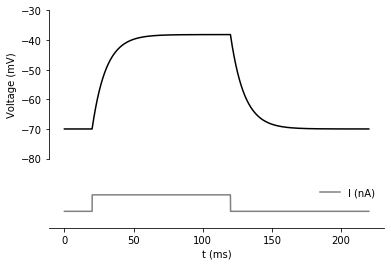

In [7]:
f, (ax0, ax1) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})
ax0.plot(t,soma_v, 'k')
ax1.plot(t,stim_current, 'gray', label='I (nA)')

ax0.set_ylabel('Voltage (mV)')
ax0.set_ylim(-80,-30)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.get_xaxis().set_visible(False)


ax1.set_ylabel('I (nA)')
ax1.set_xlabel('t (ms)')
ax1.set_ylim(-0.01,0.02)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_yaxis().set_visible(False)
ax1.legend(frameon=False)

In [8]:
stim.amp = 0


In [ ]:
# synapse response

In [9]:
# add a synapse
synapse = h.Exp2Syn(soma(0.5))
synapse.tau1 = 0.3
synapse.tau2 = 1.8
stim=h.NetStim()
stim.number = 1
stim.noise = 0 # no noise 
stim.interval = 1
net_con = h.NetCon(stim, synapse)
net_con.weight[0]= 0.0004 # the maximal conductance of the synapse



In [10]:
# record
soma_v = h.Vector()  # set up a recording vector
soma_v.record(soma(0.5)._ref_v) # record voltage at the middle of the soma
synapse_i = h.Vector()  # set up a recording vector
synapse_i.record(synapse._ref_i) # record the current in the synapse

# run
h.v_init = -70  # set starting voltage 
h.tstop = 125  # set simulation time
h.run()  # run simulation


0.0

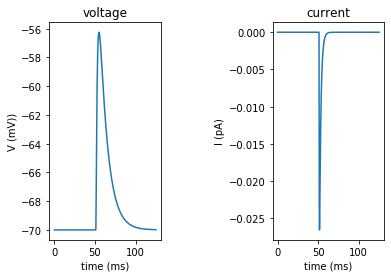

In [16]:
# plot the results
fig, ax = plt.subplots(1,2)
ax[0].plot(t,soma_v)
ax[1].plot(t, synapse_i)
ax[0].set_xlabel("time (ms)")
ax[1].set_xlabel("time (ms)")
ax[0].set_ylabel("V (mV))")
ax[1].set_ylabel("I (pA)")
ax[0].set_title("voltage")
ax[1].set_title("current")
plt.subplots_adjust(wspace=1)